# ESCUELA COMPLUTENSE DE INVIERNO - UCM 2022 (https://www.ucm.es/eci/)

## Practice 1 - Sklean

Objectives:
- Inspect the data
- Prepare data for training:
   - Split your data into training and validation.
   - Replace NAs
   - Encode categorical variables: 
      - Label encoding for tree based methoods. NA can be another category.
      - One-hot-encoding for linear models and neural networks.
   - Normalize the data for linear and neural network models.
- Train your model and do hyper-paramter search
- Cross-validation
- Lab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### Getting the data

In [2]:
def get_tumor_data():
    ! wget https://archive.ics.uci.edu/ml/machine-learning-databases/primary-tumor/primary-tumor.data
    ! wget https://archive.ics.uci.edu/ml/machine-learning-databases/primary-tumor/primary-tumor.names

In [3]:
get_tumor_data()

--2022-02-06 06:39:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/primary-tumor/primary-tumor.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12356 (12K) [application/x-httpd-php]
Saving to: ‘primary-tumor.data’

primary-tumor.data  100%[===================>]  12.07K  --.-KB/s    in 0.02s   

2022-02-06 06:39:36 (525 KB/s) - ‘primary-tumor.data’ saved [12356/12356]

--2022-02-06 06:39:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/primary-tumor/primary-tumor.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3703 (3.6K) [application/x-httpd-php]
Saving to: ‘primary-tumor.names’

primary-tumor.names 100%[=============

### Data exploration 

In [3]:
# notice the symbol "?". It looks like NAs.
! head  primary-tumor.data

1,1,1,?,3,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,?,3,2,2,2,2,2,1,2,2,2,1,2,1,2
1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
1,1,2,?,3,1,2,1,1,2,2,2,2,2,2,2,1,2
1,1,2,?,3,1,2,2,2,2,2,1,2,2,1,1,1,2
1,2,1,1,1,1,2,2,2,2,2,2,1,1,1,2,2,2
1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2
1,2,1,1,1,2,2,2,2,2,2,2,2,1,2,2,2,2
1,2,1,1,2,1,2,2,2,2,2,2,?,1,1,2,2,2


In [4]:
#! head primary-tumor.names

In [5]:
names = ["class","age","sex","histologic-type","degree-of-diffe","bone","bone-marrow","lung","pleura",
         "peritoneum","liver","brain","skin","neck","supraclavicular","axillar","mediastinum", "abdominal"]

Next we load the data with pandas.

In [6]:
df = pd.read_csv("primary-tumor.data", header=None, names=names, na_values="?")
df.head()

,class,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,1.0,NaN,3.0,2,2,1,2,2,2,2,2.0,2,2,2.0,2,2
1,1,1,1.0,NaN,3.0,2,2,2,2,2,1,2,2.0,2,1,2.0,1,2
2,1,1,2.0,2.0,3.0,1,2,2,2,2,2,2,2.0,2,2,2.0,1,2
3,1,1,2.0,NaN,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2
4,1,1,2.0,NaN,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2


In [7]:
df.describe()

,class,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
count,339.000000,339.000000,338.000000,272.000000,184.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,338.000000,339.000000,339.000000,338.000000,339.000000,339.000000
mean,8.678466,2.247788,1.523669,1.867647,2.233696,1.722714,1.979351,1.778761,1.778761,1.719764,1.678466,1.938053,1.940828,1.870206,1.820059,1.902367,1.728614,1.660767
std,7.052624,0.568362,0.500180,0.417492,0.896109,0.448321,0.142416,0.415695,0.415695,0.449778,0.467756,0.241415,0.236295,0.336573,0.384706,0.297258,0.445332,0.474149
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,7.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,14.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,22.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Notes:
- All these variables are categorical. 
- If you look the the max you realized:
   - The class has potentially 22 unique different values
   - Most variables are binary except age, histologic-type, degree-of-diffe

How many classes do we have and how many observations per class?

In [8]:
df.shape

(339, 18)

In [11]:
df["class"].value_counts()

1     84
5     39
18    29
11    28
14    24
22    24
2     20
12    16
7     14
4     14
17    10
3      9
13     7
8      6
19     6
10     2
15     2
20     2
6      1
16     1
21     1
Name: class, dtype: int64

We need a few observations (how many is not clear) to be able to train a model for a particular class. I will keep observations belonging to a class with at least 15 observations.

In [18]:
class_counts = df["class"].value_counts()
classes_to_keep = class_counts[class_counts > 15].index
classes_to_keep

Int64Index([1, 5, 18, 11, 14, 22, 2, 12], dtype='int64')

In [21]:
df_2 = df[df["class"].isin(classes_to_keep)].reset_index(drop=True)

In [22]:
df_2.shape

(264, 18)

In [23]:
df_2.head()

,class,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,1.0,NaN,3.0,2,2,1,2,2,2,2,2.0,2,2,2.0,2,2
1,1,1,1.0,NaN,3.0,2,2,2,2,2,1,2,2.0,2,1,2.0,1,2
2,1,1,2.0,2.0,3.0,1,2,2,2,2,2,2,2.0,2,2,2.0,1,2
3,1,1,2.0,NaN,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2
4,1,1,2.0,NaN,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2


### Re-label the class column

Now we need the relabel the classes

In [27]:
df_2["class"] = df_2["class"].astype("category")
df_2["class"] = df_2["class"].cat.codes
df_2["class"].value_counts()

0    84
2    39
6    29
3    28
5    24
7    24
1    20
4    16
Name: class, dtype: int64

Which columns have NAs and how many per column?

In [29]:
df_2.isnull().sum(axis = 0)

class                0
age                  0
sex                  0
histologic-type     56
degree-of-diffe    119
bone                 0
bone-marrow          0
lung                 0
pleura               0
peritoneum           0
liver                0
brain                0
skin                 1
neck                 0
supraclavicular      0
axillar              1
mediastinum          0
abdominal            0
dtype: int64

### Filling NAs
Since all these variables are categorical, it make sense to fill NAs with a new category. I will go ahead and to that for "histologic-type" and "degree-of-diffe". In the case of the 3 other missing values it doesn't make sense to make a new category snice it is just one value.

In [30]:
df_2[["histologic-type", "degree-of-diffe"]] = df_2[["histologic-type", "degree-of-diffe"]].fillna(value=0)

In [32]:
df_2.isnull().sum(axis = 0)

class              0
age                0
sex                0
histologic-type    0
degree-of-diffe    0
bone               0
bone-marrow        0
lung               0
pleura             0
peritoneum         0
liver              0
brain              0
skin               1
neck               0
supraclavicular    0
axillar            1
mediastinum        0
abdominal          0
dtype: int64

Let's assining these extra missing values to the majory category on their columns.

In [33]:
df_2.skin.value_counts()

2.0    246
1.0     17
Name: skin, dtype: int64

In [34]:
df_2["skin"] = df_2["skin"].fillna(value=2)

In [35]:
df_2.skin.value_counts()

2.0    247
1.0     17
Name: skin, dtype: int64

In [36]:
df_2.axillar.value_counts()

2.0    232
1.0     31
Name: axillar, dtype: int64

In [37]:
df_2["axillar"] = df_2["axillar"].fillna(value=2)
df_2.axillar.value_counts()

2.0    233
1.0     31
Name: axillar, dtype: int64

In [39]:
df_2.head()

,class,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,0,1,1.0,0.0,3.0,2,2,1,2,2,2,2,2.0,2,2,2.0,2,2
1,0,1,1.0,0.0,3.0,2,2,2,2,2,1,2,2.0,2,1,2.0,1,2
2,0,1,2.0,2.0,3.0,1,2,2,2,2,2,2,2.0,2,2,2.0,1,2
3,0,1,2.0,0.0,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2
4,0,1,2.0,0.0,3.0,1,2,1,1,2,2,2,2.0,2,2,2.0,1,2


## Encoding of categorical variables
The choice of encoding depends on the type of methods that we will be using. For tree based methods we could just leave the current encoding but for linear models and neural networks we need to re-encode non-binary variables.

In [41]:
df_2 = pd.get_dummies(df_2, columns=["histologic-type", "degree-of-diffe"])

In [42]:
df_2.head()

,class,age,sex,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,...,mediastinum,abdominal,histologic-type_0.0,histologic-type_1.0,histologic-type_2.0,histologic-type_3.0,degree-of-diffe_0.0,degree-of-diffe_1.0,degree-of-diffe_2.0,degree-of-diffe_3.0
0,0,1,1.0,2,2,1,2,2,2,2,...,2,2,1,0,0,0,0,0,0,1
1,0,1,1.0,2,2,2,2,2,1,2,...,1,2,1,0,0,0,0,0,0,1
2,0,1,2.0,1,2,2,2,2,2,2,...,1,2,0,0,1,0,0,0,0,1
3,0,1,2.0,1,2,1,1,2,2,2,...,1,2,1,0,0,0,0,0,0,1
4,0,1,2.0,1,2,1,1,2,2,2,...,1,2,1,0,0,0,0,0,0,1


## Split data in training and validation
Since we have 8 classes with some imbalance I will be stratifying on the label to get approximately the same proportion of labels in training and validation dataset. We first separate variables (X) from labels (Y).

In [45]:
df_2.shape

(264, 24)

In [44]:
Y = df_2["class"].values

In [46]:
# all other columns
X = df_2.iloc[:, 1:]
X.shape

(264, 23)

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, stratify=Y, test_size=0.2)

### Normalized data
Your variables should be normalized/standarized before running a linear model or a neural network. The scaling (mean and standard deviation per column) should be computed on the training data and applied to training and validation.

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [49]:
X_train[:2]

array([[ 1.32568814,  0.92243005,  0.57187763,  0.18523964,  0.46867172,
         0.54997194,  0.65243825,  0.68958283,  0.26658205,  0.27664167,
         0.38306544,  0.51329626,  0.36661779, -1.58640054,  0.67466467,
        -0.5206576 ,  2.50516707, -1.29262759, -0.15579424, -0.87082337,
        -0.42281314, -0.26658205,  1.36064373],
       [-0.37992282,  0.92243005,  0.57187763,  0.18523964,  0.46867172,
         0.54997194, -1.53271209, -1.45015212,  0.26658205,  0.27664167,
         0.38306544,  0.51329626,  0.36661779,  0.63035783, -1.48221783,
        -0.5206576 , -0.39917497,  0.77361802, -0.15579424, -0.87082337,
         2.36511099, -0.26658205, -0.73494625]])

In [53]:
# mean and std of the first column
X_train[:,0].mean(), X_train[:,0].std()

(0.0, 1.0000000000000002)

## Train and evaluate a multiclass logistic regression model

In [54]:
clf = LogisticRegression(random_state=0) # this creates a model
clf.fit(X_train, y_train) 

LogisticRegression(random_state=0)

In [55]:
y_train_hat = clf.predict(X_train)
y_valid_hat = clf.predict(X_valid)

In [56]:
# computing training and validation accuracy
accuracy_score(y_train, y_train_hat), accuracy_score(y_valid, y_valid_hat)

(0.7772511848341233, 0.6226415094339622)

In [58]:
# looking at the shape of model's parameters
clf.coef_.shape # gives you the coeficients's shape

(8, 23)

In [61]:
#clf.coef_

## Train and evaluate a multiclass logistic regression model with L1 penalty

In [67]:
for C in [0.01, 0.1, 1, 2]:
    clf = LogisticRegression(random_state=0, penalty='l1', C=C, solver='saga', max_iter=1000) # this creates a model
    clf.fit(X_train, y_train) 
    print("accuracy", clf.score(X_valid, y_valid))

accuracy 0.32075471698113206
accuracy 0.6415094339622641
accuracy 0.5849056603773585
accuracy 0.6037735849056604


In [70]:
clf = LogisticRegression(random_state=0, penalty='l1', C=0.1, solver='saga', max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=0,
                   solver='saga')

In [88]:
#clf.coef_

In [86]:
 {col:(np.abs(clf.coef_[:,col]) > 0).sum() for col in range(clf.coef_.shape[1])}

{0: 1,
 1: 1,
 2: 1,
 3: 0,
 4: 1,
 5: 0,
 6: 1,
 7: 2,
 8: 0,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 2,
 15: 0,
 16: 1,
 17: 1,
 18: 0,
 19: 0,
 20: 1,
 21: 0,
 22: 1}

## Visualizing decision variables in two variables
Note that this model is going to be much worst that the model with all variables

In [87]:
clf = LogisticRegression(random_state=0) # this creates a model
clf.fit(X_train[:,[7,14]], y_train)

LogisticRegression(random_state=0)

In [89]:
print("accuracy", clf.score(X_valid[:,[7,14]], y_valid)) # this is in 8 classes

accuracy 0.3018867924528302


In [96]:
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(-2, 2, h), np.arange(-2, 2, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [110]:
(Z==4).sum()

0

In [99]:
l=0
x1 = X_train[y_train == l, 7]
x2 = X_train[y_train == l, 14]

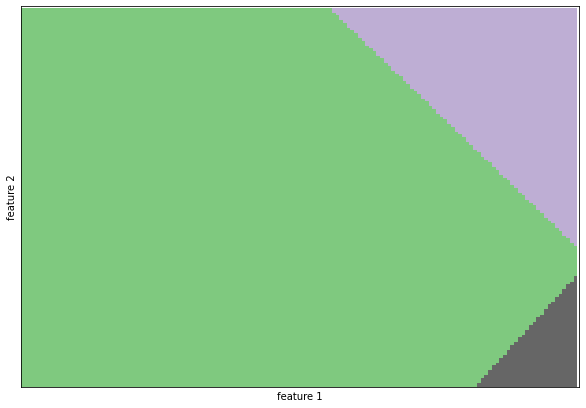

In [104]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Accent, shading='auto')

plt.xlabel('feature 1')
plt.ylabel('feature 2')

plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.xticks(())
plt.yticks(())

plt.show()

## Lab
- Find the documentation for random forest and train a model.
- Experiment with various parameters